ANSWERS:
Q2 a)  

    def linear(self, z):
        """returns result of the linear activation function on input z."""
        return z

    def linearPrime(self,z):
        """returns derivative of linear activation function applied on input z."""
        return np.ones_like(dz)
Q2 b)

    def ReLU(self,z):
        """returns result of the ReLU activation function on input z."""
        return np.maximum(0, z)

    def ReLUPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        return (dz > 0).astype(np.float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

from keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'Train: X - {X_train.shape}, y - {Y_train.shape}')
print(f'Test: X - {X_test.shape}, y - {Y_test.shape}')

Train: X - (60000, 28, 28), y - (60000,)
Test: X - (10000, 28, 28), y - (10000,)


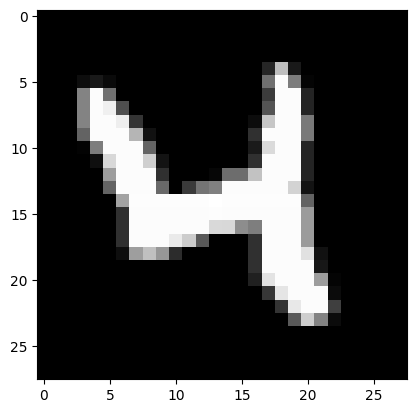



Label in dataset: 4


In [ ]:
plt.imshow(X_train[20],cmap='gray')
plt.show()
print(f"\n\nLabel in dataset: {Y_train[20]}")

In [ ]:
digits = np.unique(Y_train)
print(digits)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# M = 30 # no of instances for each class
# fig, axs = plt.subplots(len(digits), M, figsize=(18,4))
# for i,d in enumerate(digits):
#     for j in range(M):
#         axs[i,j].imshow(X_train[Y_train==d][j], cmap='gray')
#         axs[i,j].axis('off')

#counts for all unique class labels
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


In [ ]:
# Pre processing
# flattening the input

X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))
X_normalized_train = np.round(X_train_flattened/X_train_flattened.max(), 3)
X_normalized_test = np.round(X_test_flattened/X_test_flattened.max(), 3)

print(f"Shapes - Train: {X_train_flattened.shape}, Test: {X_test_flattened.shape}")
print("Minimum pixel value =", X_train_flattened.min())
print("Maximum pixel value =", X_train_flattened.max())
#print the new values
print("Minimum pixel value =", X_normalized_train.min())
print("Maximum pixel value =", X_normalized_train.max())


Shapes - Train: (60000, 784), Test: (10000, 784)
Minimum pixel value = 0
Maximum pixel value = 255
Minimum pixel value = 0.0
Maximum pixel value = 1.0


In [ ]:
#for train data
train_idx = np.where((Y_train==0) | (Y_train==1))# Here we get the index of values 0 and 1
X_train_bin = X_normalized_train[train_idx]
Y_train_bin = Y_train[train_idx]

#for test data
test_idx = np.where((Y_test==0) | (Y_test==1))
X_test_bin = X_normalized_test[test_idx]
Y_test_bin = Y_test[test_idx]

print(f'Trainset shapes - X: {X_train_bin.shape}, Y: {Y_train_bin.shape}')
print(f'Testset shapes - X: {X_test_bin.shape}, Y: {Y_test_bin.shape}')

print(f'\nTrain statistics - 0: {(Y_train_bin==0).sum()}, 1: {(Y_train_bin==1).sum()}')
print(f'Test statistics - 0: {(Y_test_bin==0).sum()}, 1: {(Y_test_bin==1).sum()}')


Trainset shapes - X: (12665, 784), Y: (12665,)
Testset shapes - X: (2115, 784), Y: (2115,)

Train statistics - 0: 5923, 1: 6742
Test statistics - 0: 980, 1: 1135


In [ ]:
from sklearn.model_selection import train_test_split
X_train_bin, X_val_bin, Y_train_bin, Y_val_bin = train_test_split(X_train_bin, Y_train_bin, test_size=0.2, random_state = 28)

print("Instances in new train-set:", len(Y_train_bin))
print("Instances in val-set:", len(Y_val_bin))
print("\nCount of 0s and 1s in train-set:", (Y_train_bin==0).sum(), (Y_train_bin==1).sum())
print("Count of 0s and 1s in val-set:", (Y_val_bin==0).sum(), (Y_val_bin==1).sum())

Instances in new train-set: 10132
Instances in val-set: 2533

Count of 0s and 1s in train-set: 4745 5387
Count of 0s and 1s in val-set: 1178 1355


In [ ]:
# Transpose feature matrices as per our model requirement

X_train_bin, X_val_bin, X_test_bin = X_train_bin.T, X_val_bin.T, X_test_bin.T
print(f'Shapes - {X_train_bin.shape, X_val_bin.shape, X_test_bin.shape}')

Shapes - ((784, 10132), (784, 2533), (784, 2115))


In [ ]:
class Neural_Network():
    def __init__(self, neurons, Activations, initialization='randn'):
        """Define the NN design parameters
        Args:
            neurons (int array): list of number of neurons in each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """

        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer
        self.layer_activations = [] # activations for each layer

        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
           raise ValueError("initialization must be 'rand' or 'randn' or 'he' or 'xavier'")
        for i in range(len(neurons)-1):
            self.weights.append(self.initializer(neurons[i+1],neurons[i])) # weight matrix between layer i and layer i+1
            self.biases.append(self.initializer(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) # activations for each layer

    def linear(self, z):
        """returns result of the linear activation function on input z."""
        return z

    def linearPrime(self,z):
        """returns derivative of linear activation function applied on input z."""
        return np.ones_like(dz)

    def ReLU(self,z):
        """returns result of the ReLU activation function on input z."""
        return np.maximum(0, z)

    def ReLUPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        return (z > 0).astype(np.float32)

    def lossSE(self, predicted, actual):
        """Implementation of Squared-error loss function."""
        return 0.5*np.mean((predicted - actual)**2)

    def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        return -np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))


    def forward(self, x):
        """Defines forward pass of the NN

        Args:
            x (array): input of size self.inputSize

        Returns:
            a (array): output of the forward pass
            layer_dot_prod_z (list): layerwise intermediate outputs
            layer_activations_a (list): layerwise activations
        """

        layer_activations_a = [x] # store the outputs of activation
        a=x  ## storing input as activation of zero-th layer
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]

            #
            z = np.dot(w,x) + b
            #

            # if self.layer_activations[i].lower()=='sigmoid':
            #     a = self.sigmoid(z)
            if self.layer_activations[i].lower()=='relu':
                a = self.ReLU(z)
            elif self.layer_activations[i].lower()=='linear':
                a = self.linear(z)
            # elif self.layer_activations[i].lower()=='softmax':
            #     a = self.softmax(z)
            layer_dot_prod_z.append(z)
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a

    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """
        n = zs[-1].shape[0]
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        for t in range(1, len(activations)):
            if t == 1:
                delta = (activations[-t] - y)
                if np.isnan(activations[-t]).any():
                    print("NaN detected in delta after backpropagation.")
                    return
            else:
                delta = np.dot(delta, self.weights[-t+1])
                if np.isnan(delta).any():
                    print("NaN detected in delta after backpropagation.")
                    return
                
            if self.layer_activations[-t].lower()=='sigmoid':
                delta *= self.sigmoidPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='relu':
                delta *= self.ReLUPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='softmax':
                delta *= self.softmaxPrime(zs[-t], y)
            else:
                raise ValueError("Activation function not supported")
            grad_b[-t] = (np.sum(delta, axis=0, keepdims=True) / n).T
            grad_w[-t] = (np.dot( activations[-t-1].T, delta) / n).T

        return (grad_b, grad_w)

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients

        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """

        grad_b, grad_w = grads[0], grads[1]

        for i in range(len(self.weights)):
            self.weights[i] -= lr * grad_w[i]
            self.biases[i] -= lr * grad_b[i]

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)

    def error(self, X, Y, errors):
        """Appends loss to error list"""
        y = np.squeeze(self.forward(X)[0])
        errors.append(self.loss(y, Y))

    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None,
              n_classes=10, onehotencoded=False, loss_func='SE', Xval=None, Yval=None, verbose=True):

        if onehotencoded:
            # a method for creating one hot encoded labels
            def onehotencoding(Y, n):
                # one-hot encoding of class i is just the ith column of the identity
                # matrix of size n where n is the total number of classes. so below
                # code uses Y (a 1d array) for indexing into the identity matrix.

                ### TODO: return one-hot encoding for Y
                onehot = np.zeros((n, Y.shape[1]))
                onehot[Y[0].astype(int), np.arange(Y.shape[1])] = 1
                return onehot

            Y = onehotencoding(Y, n_classes)
            if Yval is not None:
                Yval = onehotencoding(Yval, n_classes)

        # Below code ensures that Y is 2-dimensional even when one-hot encoding is not
        # performed, so our same code works for training NN for both tasks.
        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval

        if loss_func == 'SE':
            self.loss = self.lossSE
        elif loss_func == 'CE':
            self.loss = self.lossCE

        train_errors=[]
        # if Xval is not None:
        #     val_errors=[]
        val_errors=[]

        i, j, v = 0, 0, np.inf     ## i -> epoch, j->patience, v ->best loss
        best_params = self.copy_params()

        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:   ## if batch_size is not given
            batch_size = len(X[0])

        #LR control function
        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
          get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')

        while j < patience:

            ### TODO: Implement the training algorithm with option for mini-batches
            # Shuffle Dataset
            num_samples = X.shape[1]
            idx = np.random.permutation(num_samples)
            X = X[:, idx]
            Y = Y[:, idx]

            #for every batch do
            for batch_start in range(0, num_samples, batch_size):
                batch_end = min(batch_start + batch_size, num_samples)
                X_batch = X[:, batch_start:batch_end]
                Y_batch = Y[:, batch_start:batch_end]

                #do forward pass
                y, zs, activations = self.forward(X_batch)

                #compute gradients using backpropagation
                grads = self.backward(X_batch, Y_batch, zs, activations)

                #update parameters
                self.update_parameters(grads, get_lr(i))

            i += 1 # increment epoch count

            self.error(X, Y, train_errors)   ### appending the loss to train_errors
            if Xval is not None:
                self.error(Xval, Yval, val_errors)    ## appending the val_loss to errors

                if val_errors[-1] < v:
                    j = 0 # reset patience counter
                    v = val_errors[-1] # update best loss
                    best_params = self.copy_params() # save params
                else:
                    j += 1 # increment patience counter

            if verbose and i%5 == 0:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)

            if i >= max_epochs:
                break # stop if epoch threshold crossed

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Early Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params

        if verbose:
            x = np.arange(1, len(train_errors)+1)
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()
        if Xval is not None:
            return (train_errors, val_errors)
        return train_errors

    def predict(self, x):
        y_pred, _, _ = self.forward(x)
        return np.round(y_pred)

In [ ]:
D_in, H1, H2, D_out = 784, 200, 100, 1
neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['linear','linear','linear'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin = Neural_Network(neurons, activation_functions)

In [ ]:
X_train_bin[0].shape

(10132,)

In [ ]:
losses = nn_bin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=50, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

ValueError: shapes (100,200) and (784,10) not aligned: 200 (dim 1) != 784 (dim 0)